# Team 7 IoT Final Project - Manikandan Ramalingam and Titouan Magret

## MENTAL HEALTH ANALYSIS AND STRESS DETECTION USING IoT SENSORS

In today’s world, there is a need to detect the stress based on various readings from wearable IoT devices in humans and even pets. Stress management has become major topic of discussion and number one reason for heart diseases in humans. This project deals the analysis and monitoring of mental health conditions using wearable IoT technology, specifically focusing on cognitive and emotional states. 

### Mental Health Wearable Dataset

This dataset was downloaded from Kaggle at https://www.kaggle.com/datasets/ziya07/mental-health-monitor-using-wearable-iot-sensors.
The data set contains around 500 records in total with sensor readings collected for every 5 minutes over a span of 3 days. There were 12 feature columns that gives EEG and GSR readings. The cognitive state and emotional states are captured in the features as well as categorical variables.


#### Get the Mental Health Wearable Dataset

  The dataset from https://www.kaggle.com/datasets/ziya07/mental-health-monitor-using-wearable-iot-sensors is downloaded to local folder and check the contents of the file.

In [285]:
import pandas as pd

# Fetch the train data into the data frame
df = pd.read_csv('/Users/diyamanipriya/Downloads/mental_health_wearable_data.csv')

shape = df.shape
print("Shape of the dataframe (row, col):",shape,"\r\n")

# Show the dataframe
df.head()

Shape of the dataframe (row, col): (500, 13) 



,Timestamp,EEG_Frequency_Bands,GSR_Values,Cognitive_State,Emotional_State,Student_ID,Age,Gender,Session_Type,Duration (minutes),Environmental_Context,Preprocessed_Features,Target
0,2025-01-01 10:00:00,"[7.400574384984986, 5.621240954745124, 4.62440...",1.376494,Distracted,Anxious,151,19,Female,Study,43,Library,"(0.09206977288455342, 0.3621872664986312)",0
1,2025-01-01 10:05:00,"[1.6898477932146672, 7.2616994947041125, 1.106...",0.084319,Focused,Stressed,150,20,Male,Test,49,Home,"(0.6630302454051626, 0.16534951688386967)",1
2,2025-01-01 10:10:00,"[0.2693319401287453, 8.909349692334239, 7.2444...",0.895629,Cognitive Overload,Anxious,173,24,Male,Test,56,Library,"(0.01057761975425231, 0.20044284523215694)",1
3,2025-01-01 10:15:00,"[6.080175212895389, 6.387554935291081, 9.09906...",0.386398,Focused,Anxious,171,22,Male,Relaxation,48,Library,"(0.2924924921884593, 0.8773068202243881)",1
4,2025-01-01 10:20:00,"[5.9007231710422525, 8.301537594579075, 4.4649...",1.186898,Focused,Anxious,131,22,Female,Relaxation,57,Home,"(0.7670629457831021, 0.5652674255918193)",0


### Exploratory Data Analysis

1. Check the data types of the data set columns.
2. The rows with no meaningful values to be cleaned and filled with either mean imputation or forward fill approach as it is time series      data.Since the data is obtained every 5 minutes, we shouldn't be cutting the rows. 
3. Un-necessary columns to be removed by human judgement.
4. Encode the categorical variables.
5. Pre-process the column values with scaling and normalization techniques.
6. Check if we have equal values for high stress and low stress targets. Unequal quantitites will result in model getting overfitted. If
   need be, the data rows to be pruned.
7. Identify the top 5 features in the data set that tilts the target values. This will help in using most significant features in the
   dataset for analysis.                                                                                                                                                

#### Check the data types and their shape

The data types of the data frame are analyzed using pandas.

In [206]:
# Display data types of all columns
print(df.dtypes)

Timestamp                 object
EEG_Frequency_Bands       object
GSR_Values               float64
Cognitive_State           object
Emotional_State           object
Student_ID                 int64
Age                        int64
Gender                    object
Session_Type              object
Duration (minutes)         int64
Environmental_Context     object
Preprocessed_Features     object
Target                     int64
dtype: object


#### Modify Rows if empty column values

The rows with no meaningful values to be cleaned and filled with either mean imputation or forward fill approach as it is time series data. Since the data is obtained every 5 minutes, we shouldn't be cutting the rows.

In [287]:
# Check rows containing NaN values
print(df[df.isna().any(axis=1)])

Empty DataFrame
Columns: [Timestamp, EEG_Frequency_Bands, GSR_Values, Cognitive_State, Emotional_State, Student_ID, Age, Gender, Session_Type, Duration (minutes), Environmental_Context, Preprocessed_Features, Target]
Index: []


From above output, it is clear the data set is clean and it has no NaN (empty) values. So, no mean imputation or forward fill technique required to fill in empty columns.

#### Un-necessary columns to be removed by human judegement

  Before training the model, human judgement and pruning on the data set is essential. From the looks of it, it seems Student Id, Environmental Context columns doesn't add much value to our analysis. So, those columns have to be removed.
  

In [289]:
# Drop the specified columns
df = df.drop(columns=['Student_ID', 'Environmental_Context', 'Preprocessed_Features'])

# Display the updated DataFrame
df.head()

,Timestamp,EEG_Frequency_Bands,GSR_Values,Cognitive_State,Emotional_State,Age,Gender,Session_Type,Duration (minutes),Target
0,2025-01-01 10:00:00,"[7.400574384984986, 5.621240954745124, 4.62440...",1.376494,Distracted,Anxious,19,Female,Study,43,0
1,2025-01-01 10:05:00,"[1.6898477932146672, 7.2616994947041125, 1.106...",0.084319,Focused,Stressed,20,Male,Test,49,1
2,2025-01-01 10:10:00,"[0.2693319401287453, 8.909349692334239, 7.2444...",0.895629,Cognitive Overload,Anxious,24,Male,Test,56,1
3,2025-01-01 10:15:00,"[6.080175212895389, 6.387554935291081, 9.09906...",0.386398,Focused,Anxious,22,Male,Relaxation,48,1
4,2025-01-01 10:20:00,"[5.9007231710422525, 8.301537594579075, 4.4649...",1.186898,Focused,Anxious,22,Female,Relaxation,57,0


#### Encode the categorical variables

Encoding the categorical variables is vital for any IoT sensor data analysis. The machine learning techniques can be applied only to numerical data. I use the Label Encoder here from scikit learn library.

In [291]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Cognitive_State'] = encoder.fit_transform(df['Cognitive_State'])
df['Emotional_State'] = encoder.fit_transform(df['Emotional_State'])
df['Gender'] = encoder.fit_transform(df['Gender'])  # Example: Female = 0, Male = 1
df['Session_Type'] = encoder.fit_transform(df['Session_Type'])

In [196]:
df.head()

,Timestamp,GSR_Values,Cognitive_State,Emotional_State,Age,Gender,Session_Type,Duration (minutes),Target,Delta,Theta,Alpha,Beta
0,2025-01-01 10:00:00,1.376494,1,0,19,0,1,43,0,7.400574,5.621241,4.624408,6.442217
1,2025-01-01 10:05:00,0.084319,2,2,20,1,2,49,1,1.689848,7.261699,1.106907,6.056717
2,2025-01-01 10:10:00,0.895629,0,0,24,1,2,56,1,0.269332,8.909350,7.244487,4.700589
3,2025-01-01 10:15:00,0.386398,2,0,22,1,0,48,1,6.080175,6.387555,9.099068,4.939196
4,2025-01-01 10:20:00,1.186898,2,0,22,0,0,57,0,5.900723,8.301538,4.464960,2.573700


#### Scaling and Normalization

 Since each of the above numeric values are different and also EEG_Frequency_Bands is a vector with different values of delta, alpha, beta and gamma of brain activity, it is important to split those into different columns to not lose value out of it. 

 So, we use Standard scalar to normalize all these values. 

In [293]:
from sklearn.preprocessing import StandardScaler

# Initialize scalers
scaler_standard = StandardScaler()

# Convert EEG_Frequency_Bands list into separate columns
df_eeg = df['EEG_Frequency_Bands'].apply(lambda x: pd.Series(eval(x) if isinstance(x, str) else x))

# Rename EEG columns for clarity
df_eeg.columns = ['Delta', 'Theta', 'Alpha', 'Beta']

# Scale EEG Frequency Bands using Standard Scaler
df_eeg_scaled = pd.DataFrame(scaler_standard.fit_transform(df_eeg), columns=df_eeg.columns)

# Scale GSR Values using Standard Scaler
df['GSR_Values'] = scaler_standard.fit_transform(df[['GSR_Values']])

# Scale Encoded Categorical Columns (Cognitive_State, Emotional_State, Age, Gender, Session_Type, Duration)
cols_to_scale = ['Cognitive_State', 'Emotional_State', 'Age', 'Gender', 'Session_Type', 'Duration (minutes)']
df[cols_to_scale] = scaler_standard.fit_transform(df[cols_to_scale])

# Drop original EEG column and merge back scaled EEG
df = df.drop(columns=['EEG_Frequency_Bands']).reset_index(drop=True)
df = pd.concat([df, df_eeg_scaled], axis=1)

# Display updated DataFrame
df.head()

,Timestamp,GSR_Values,Cognitive_State,Emotional_State,Age,Gender,Session_Type,Duration (minutes),Target,Delta,Theta,Alpha,Beta
0,2025-01-01 10:00:00,0.631951,0.012443,-1.206213,-1.054731,-0.976281,-0.039301,-0.233973,0,0.803923,0.193631,-0.129834,0.471792
1,2025-01-01 10:05:00,-1.644861,1.256721,1.343920,-0.610072,1.024295,1.188848,0.417762,1,-1.187227,0.750348,-1.357786,0.336428
2,2025-01-01 10:10:00,-0.215333,-1.231835,-1.206213,1.168564,1.024295,1.188848,1.178118,1,-1.682515,1.309506,0.784830,-0.139761
3,2025-01-01 10:15:00,-1.112597,1.256721,-1.206213,0.279246,1.024295,-1.267450,0.309139,1,0.343541,0.453693,1.432260,-0.055976
4,2025-01-01 10:20:00,0.297882,1.256721,-1.206213,0.279246,-0.976281,-1.267450,1.286740,0,0.280972,1.103235,-0.185497,-0.886593


#### Check for Data set inequalities for classification

Check if we have equal values for high stress and low stress targets. Unequal quantitites will result in model getting overfitted. If need be, the data rows to be pruned.

In [295]:
print(df[df['Target'] == 0].count())
print(df[df['Target'] == 1].count())

Timestamp             251
GSR_Values            251
Cognitive_State       251
Emotional_State       251
Age                   251
Gender                251
Session_Type          251
Duration (minutes)    251
Target                251
Delta                 251
Theta                 251
Alpha                 251
Beta                  251
dtype: int64
Timestamp             249
GSR_Values            249
Cognitive_State       249
Emotional_State       249
Age                   249
Gender                249
Session_Type          249
Duration (minutes)    249
Target                249
Delta                 249
Theta                 249
Alpha                 249
Beta                  249
dtype: int64


 From above, we can see that data set is fairly optimal and it doesn't require us to prune. So, we can hope our model won't overfit for low stress level to high stress level as number of rows are approximately same.

#### Analyze the relationship with features to Target variable (High stress Vs Low stress)

For this below techniques can be used.
1. Corelation Heatmap - This shows how the features are correlated with each other and the target.
2. Pairplot - This helps to visualize the relationship with features to target as well.
   

##### Correlation HeatMap
This shows how the features are correlated with each other and the target.

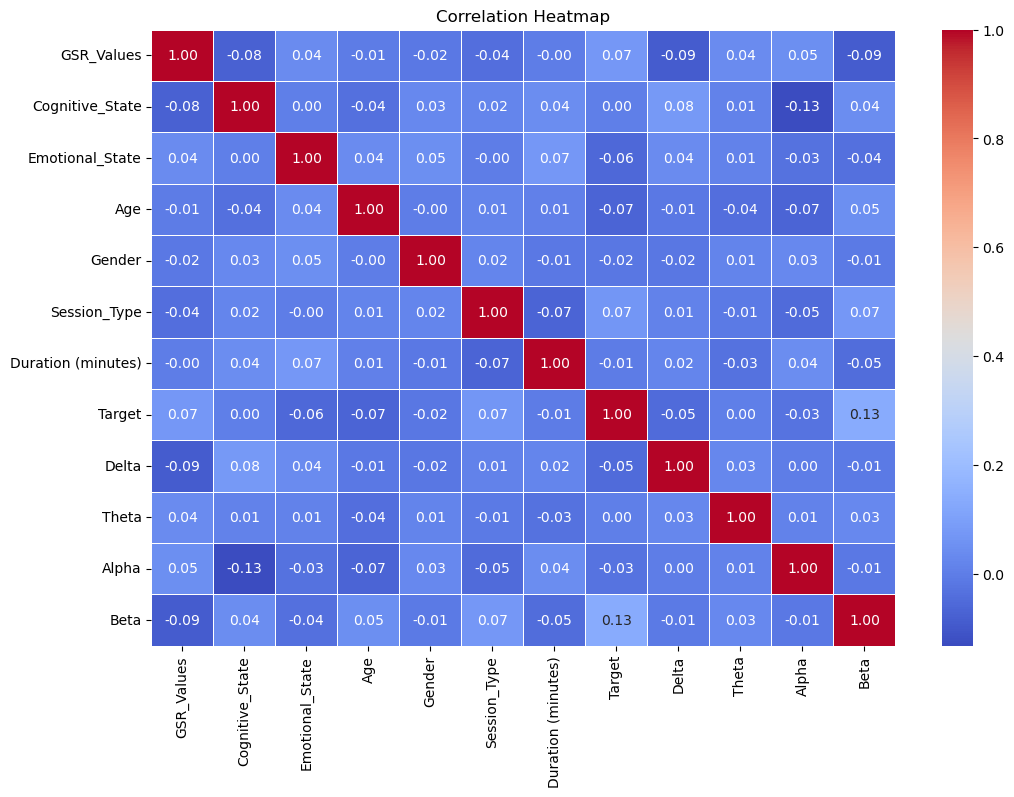

In [297]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the Timestamp column for plotting
df_for_plotting = df.drop(columns=['Timestamp'])

# Correlation heatmap excluding Timestamp
corr_matrix = df_for_plotting.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

 From the above, we can see there is a correlation between all these items to the high stress level target variable. So, each of these features equally contribute to our analysis.

##### Pairplot Relationship

This helps to visualize the relationship with features to target as well as a scatterplot.

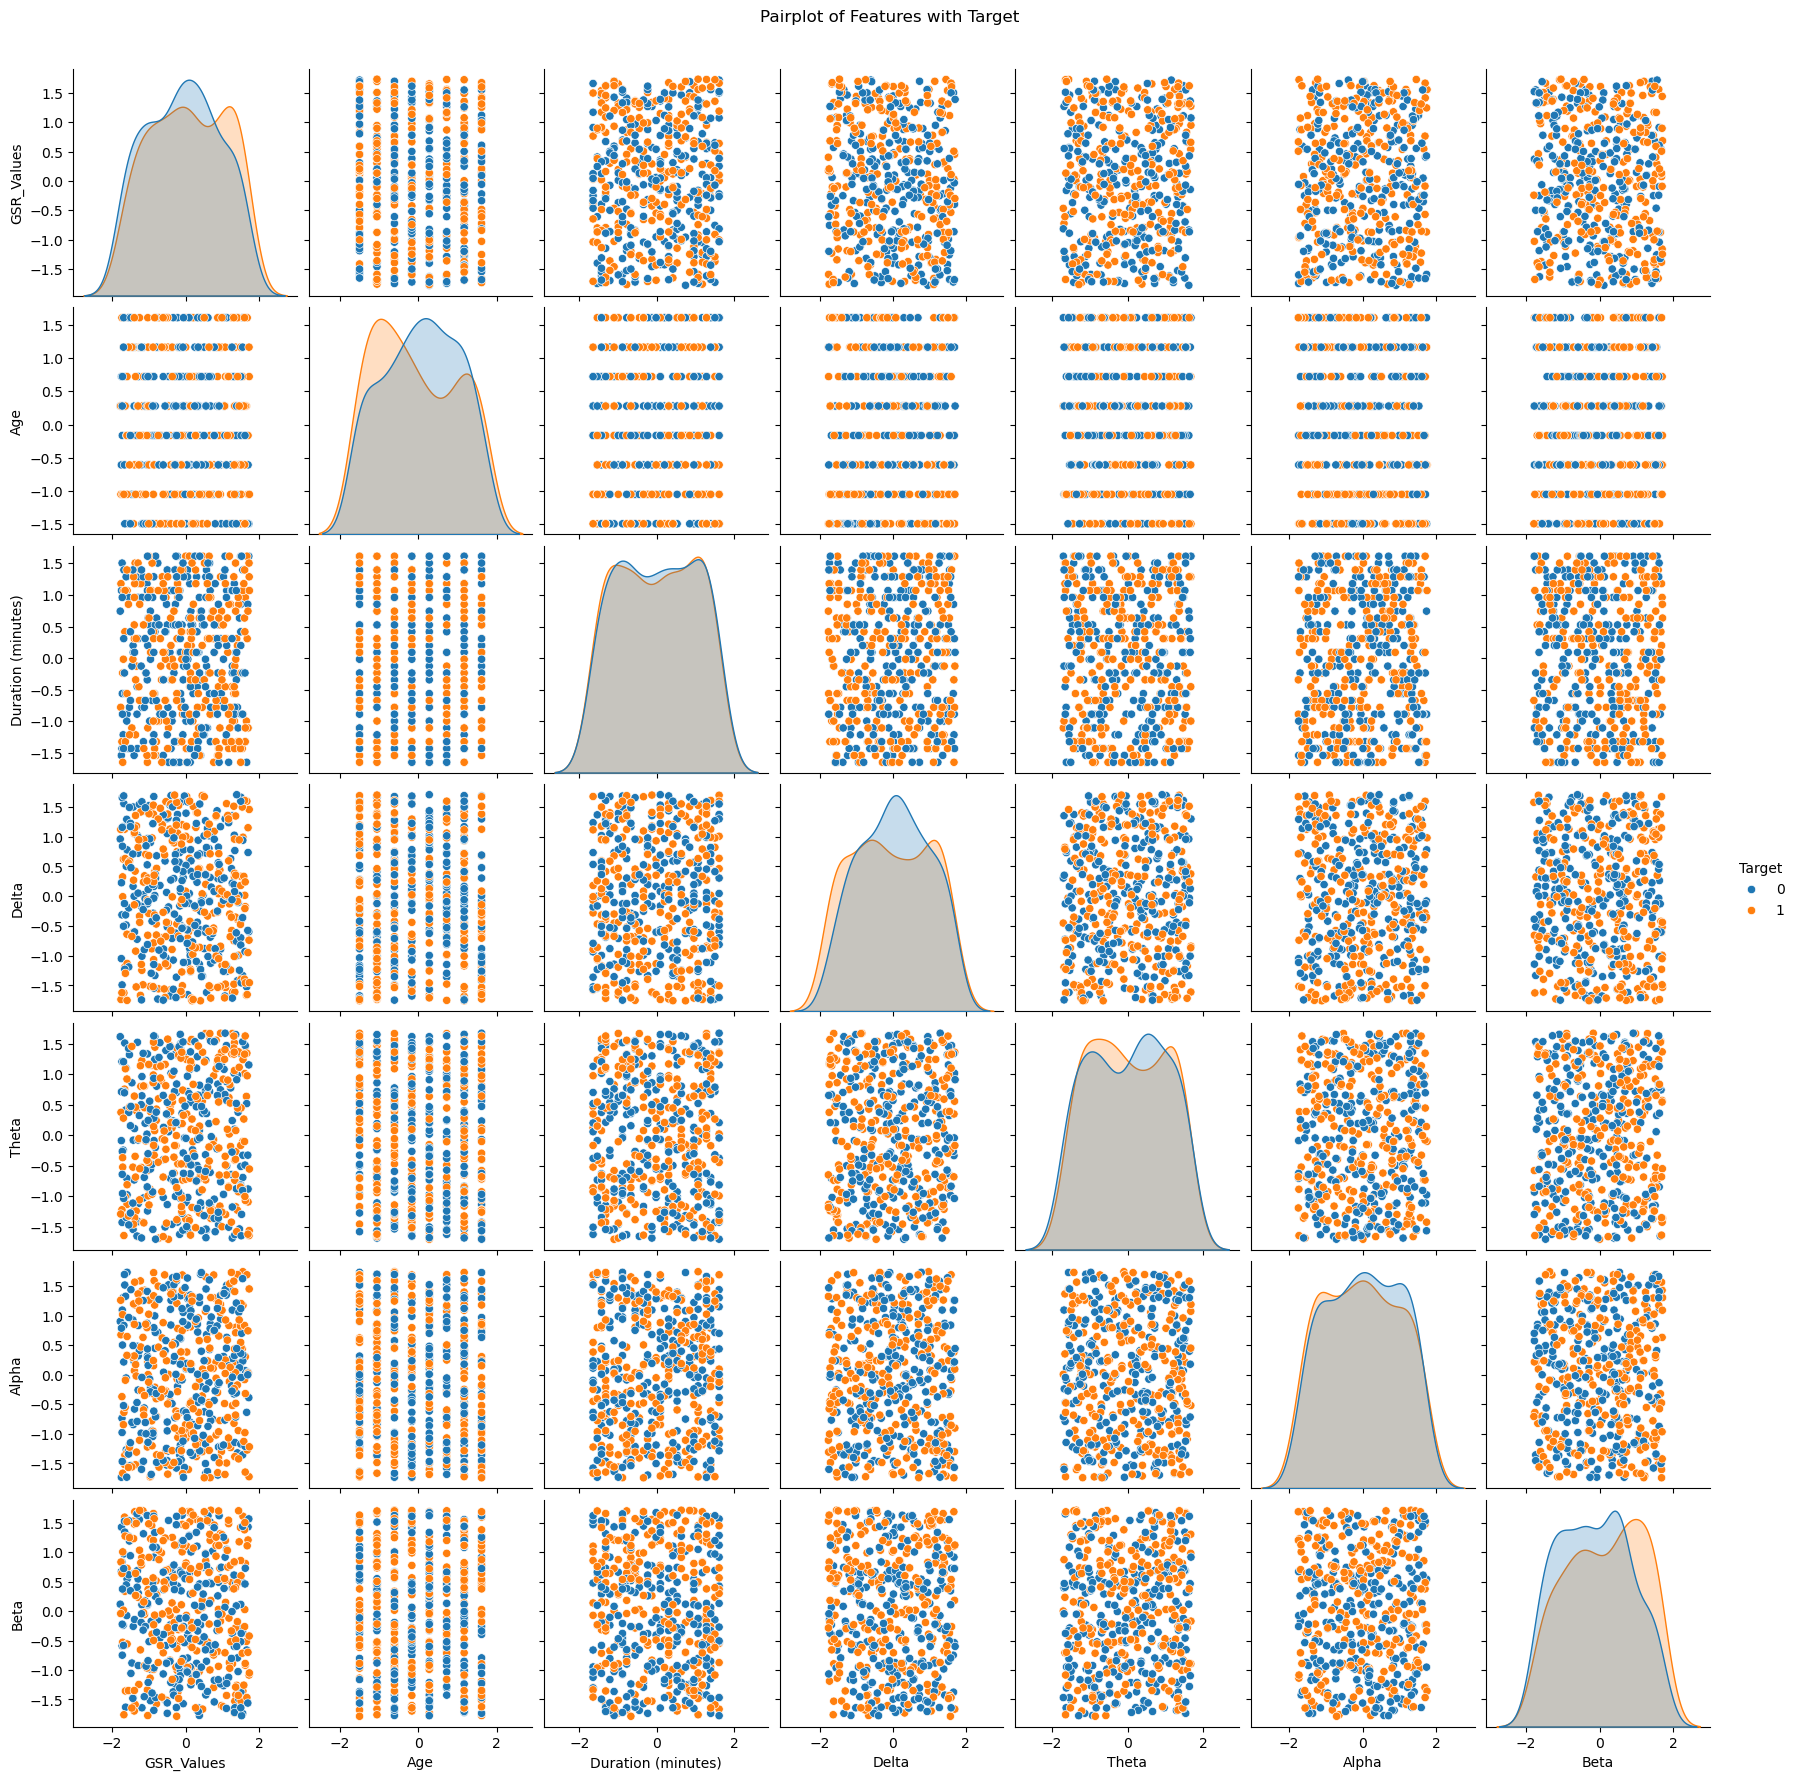

In [20]:
# Plot pairplot (for continuous features and target)
sns.pairplot(df, hue="Target", vars=['GSR_Values', 'Age', 'Duration (minutes)', 'Delta', 'Theta', 'Alpha', 'Beta'])
plt.suptitle("Pairplot of Features with Target", y=1.02)
plt.show()

 The distribution is almost normal for the data set with target of 0 (Low stress) but for 1 it fluctuates for GSR value. There is equal distribution of values for each of these features.

### Checking Top Features

  It is always important to know the features that is more related to target and has significant influence. This is to generalize our machine learning model and prevent it from overfitting. It also helps in determining the features that aren't important in dimensionality reduction.

#### Use RandomForestRegressor

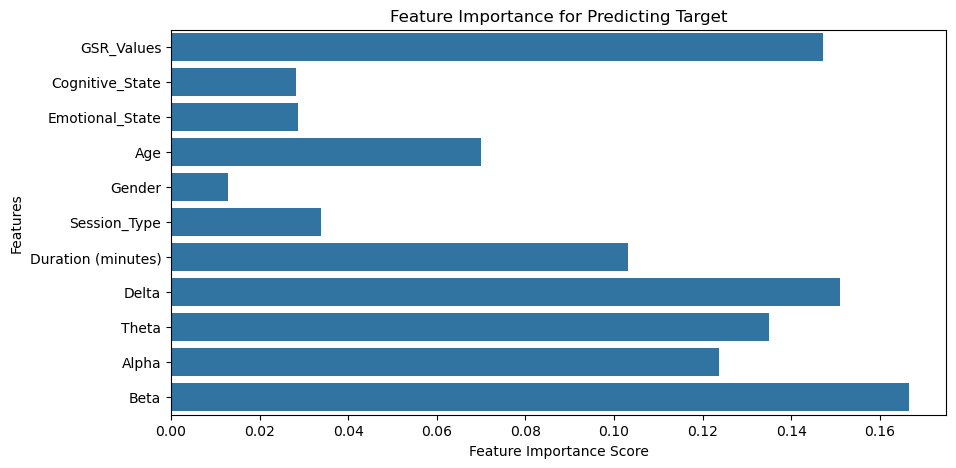

In [376]:
from sklearn.ensemble import RandomForestRegressor

df_new = df
# Train a Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df_new.drop(columns=['Target']), df_new['Target'])

# Get Feature Importances
importances = rf.feature_importances_
feature_names = df_new.drop(columns=['Target']).columns

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Predicting Target")
plt.show()

 From above, we can see the Beta, Delta and GSR values are the most important features that can tilt the target values.

## Machine Learning Methods used for Time series and Deep Learning Requirement

1. Long Short Term Memory - LSTMs can capture long-term and short-term dependencies in sequential data through their internal memory
   cells, which allows them to use past data to predict future values effectively. They can remember past values over long sequences.
   Thus, they are suitable for problems where previous data points influence future ones. By learning from sequential data, LSTMs can
   adapt to changing patterns in the time series, making them more powerful for forecasting tasks that involve periodic fluctuations or
   long-term trends. So, it solves our prediction requirement.
2. Exxponential Smoothing RNN - Exponential Smoothing will help model the underlying seasonality and trends in the data. So, it solves our
   time series requirement that classifies high stress Vs low stress.

### Long Short Term Memory (LSTM) - Prediction Requirement

The Tensorflow Keras python libraries were used to create the neural network model with multiple layers, validate, evaluate and predict the results.

The task involves the following steps,

1. Data preparation - Time stamp to be modified to date time instead of string values to get meaningful results.
2. Dataset Split for training and validation.
3. Model creation using tensorflow libraries.
4. Model Training with training data set.
5. Model Evaluation, accuracy check and confusion matrix for classification.
6. Predict the model results for unseen data.


#### Data Preparation

Time stamp to be modified to date time instead of string values to get meaningful results.

In [299]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index as the model will learn the temporal dependencies more easily.
df.set_index('Timestamp', inplace=True)

In [216]:
df.dtypes

GSR_Values            float64
Cognitive_State       float64
Emotional_State       float64
Age                   float64
Gender                float64
Session_Type          float64
Duration (minutes)    float64
Target                  int64
Delta                 float64
Theta                 float64
Alpha                 float64
Beta                  float64
dtype: object

In [301]:
df.head()

,GSR_Values,Cognitive_State,Emotional_State,Age,Gender,Session_Type,Duration (minutes),Target,Delta,Theta,Alpha,Beta
Timestamp,,,,,,,,,,,,
2025-01-01 10:00:00,0.631951,0.012443,-1.206213,-1.054731,-0.976281,-0.039301,-0.233973,0,0.803923,0.193631,-0.129834,0.471792
2025-01-01 10:05:00,-1.644861,1.256721,1.343920,-0.610072,1.024295,1.188848,0.417762,1,-1.187227,0.750348,-1.357786,0.336428
2025-01-01 10:10:00,-0.215333,-1.231835,-1.206213,1.168564,1.024295,1.188848,1.178118,1,-1.682515,1.309506,0.784830,-0.139761
2025-01-01 10:15:00,-1.112597,1.256721,-1.206213,0.279246,1.024295,-1.267450,0.309139,1,0.343541,0.453693,1.432260,-0.055976
2025-01-01 10:20:00,0.297882,1.256721,-1.206213,0.279246,-0.976281,-1.267450,1.286740,0,0.280972,1.103235,-0.185497,-0.886593


#### Creating Sequences

For LSTM, we need to create sliding windows of previous time steps as input features. Since the time interval is 5 minutes, we can create sequences of, for example, the previous 3 time steps to predict the next one.

In [303]:
# Method to create sequences

def create_sequences(df, target_column='Target', sequence_length=3):
    sequences = []
    targets = []
    
    for i in range(len(df) - sequence_length):
        sequences.append(df.iloc[i:i+sequence_length].drop(columns=[target_column]).values)
        targets.append(df.iloc[i+sequence_length][target_column])
    
    return np.array(sequences), np.array(targets)

In [305]:
import numpy as np

# Create the sequence

# Drop the 'Target' column for creating sequences
X, y = create_sequences(df, target_column='Target', sequence_length=3)

# Ensure X and y are shaped for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

#### Split data into train and test sets

Use scikitlearn library to split the data into train and test sets. The data is split as 80% for training and 20% for validation tests.

In [307]:
from sklearn.model_selection import train_test_split

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### Model Creation
 
 We use Tesnorflow and Keras libraries to create LSTM layer. Activation function for LSTM layer will be ReLU with a dropout of 20% for regularization. The output layer would be sigmoid function since it is binary classification (high stress, low stress). We use Adam optimizer and for loss function, we use binary_crossentropy

In [309]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential()

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

# LSTM layer (input_shape is (timesteps, features))
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout for regularization

# Output layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Train the Model

The model.fit method in keras library is used to train the model with training and validation data set split. It is trained for 20 epochs and batch size as 32.

In [311]:

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4525 - loss: 0.7042 - val_accuracy: 0.4500 - val_loss: 0.6951
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.4948 - loss: 0.6959 - val_accuracy: 0.4800 - val_loss: 0.6969
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.5892 - loss: 0.6828 - val_accuracy: 0.4800 - val_loss: 0.7030
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.5400 - loss: 0.6831 - val_accuracy: 0.4800 - val_loss: 0.7032
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.5456 - loss: 0.6866 - val_accuracy: 0.4800 - val_loss: 0.7026
Restoring model weights from the end of the best epoch: 1.


#### Model Evaluation

  The model.evaluate method from keras library is used. The loss and accuracy are checked. 

In [313]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4331 - loss: 0.6968
Test Accuracy: 0.4500


From above, we can see the model performance is poor. We have to use few fine tuning methods to improve the model performance. First, let the model predict and see confusion matrix.

#### Model Prediction

 The model.predict method from Keras library can be used for this.

In [339]:
# Predict on the test set
y_pred = model.predict(X_test)

# You can convert the predicted values into the desired format (e.g., class labels)
y_pred_class = (y_pred > 0.50).astype(int)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step


#### Plot the predicted vs actual for test data

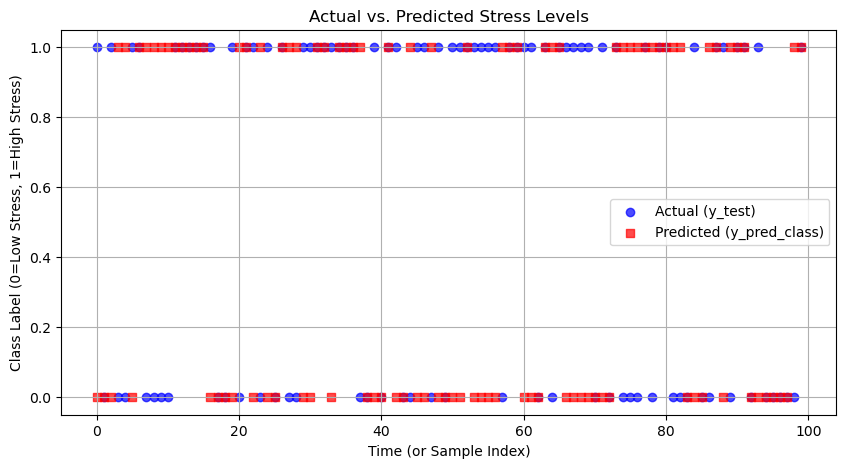

In [341]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Actual (y_test)", marker='o', color='blue', alpha=0.7)
plt.scatter(range(len(y_pred_class)), y_pred_class, label="Predicted (y_pred_class)", marker='s', color='red', alpha=0.7)

plt.xlabel("Time (or Sample Index)")
plt.ylabel("Class Label (0=Low Stress, 1=High Stress)")
plt.title("Actual vs. Predicted Stress Levels")
plt.legend()
plt.grid(True)
plt.show()

##### Confusion Matrix

The confusion matrix shows how the model performs on the test data. The diagonal column shows how the model correctly predicts and the other columns are false positives or false negatives.

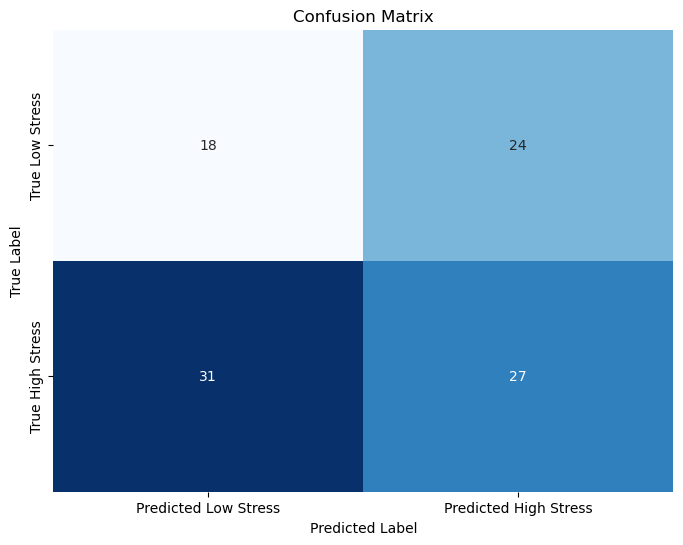

In [343]:
from sklearn.metrics import confusion_matrix

# Confusion matrix calculation
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Low Stress', 'Predicted High Stress'], yticklabels=['True Low Stress', 'True High Stress'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### Loss Curve

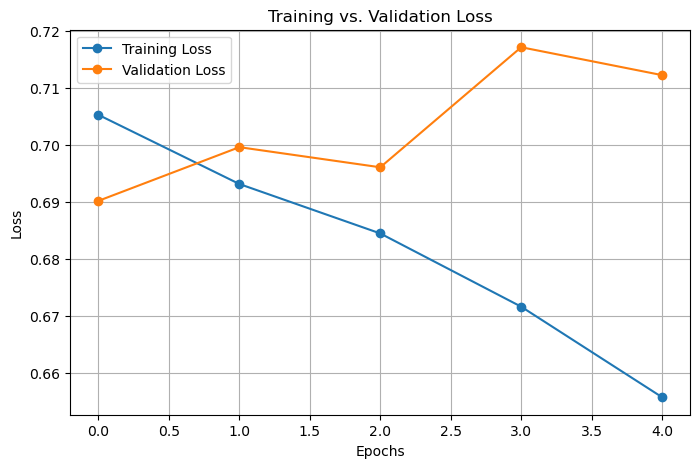

In [354]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    """
    Plots the training vs validation loss curve.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# After training, call this function
plot_loss_curve(history)

From above, we can see the model performance is poor and just has 48% accuracy. We have to use few fine tuning methods to try and improve the model performance. One good thing we can see is model not getting overfitted although dataset contains only 500 parameters.


### LSTM Model Performance Tuning

The below are some methods to be tried to improve the performance.

1. Increasing sequence length. - currently it is 3. 5-10 can be checked.
2. Increasing LSTM units and Layers
3. Adding dropout and batch normalization for each layer
4. Bi-directional LSTM for better learning
5. Optimize learning rate using ReduceLROnPlateau


#### Increasing Sequence Length

  Currently the sequence length are kept at 3. This can be increased to 5 or 10 and check the performance.

In [356]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Method to check for performance with different sequence lengths

from tensorflow.keras.callbacks import EarlyStopping

def train_lstm(df, target_column='Target', sequence_length=5, epochs=50, batch_size=8, test_size=0.2):
    """
    Trains an LSTM model on time-series data with Early Stopping.
    """
    # Create sequences
    X, y = create_sequences(df, target_column, sequence_length)

    # Reshape for LSTM input (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

    # Split data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model with Early Stopping
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_test, y_test), 
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, accuracy, history

#### Try with sequence as 5 and batch_size as 2

Call the above method to check for accuracy. Return the model and accuracy acheived. Used Early stopping so that the model doesn't overfit as we only have 500 records.

In [358]:
import numpy as np

model, acc, history = train_lstm(df, target_column='Target', sequence_length=5, epochs=5, batch_size=2)

Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.4562 - loss: 0.7031 - val_accuracy: 0.4343 - val_loss: 0.7014
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.5174 - loss: 0.6861 - val_accuracy: 0.4646 - val_loss: 0.6978
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.5753 - loss: 0.6764 - val_accuracy: 0.5859 - val_loss: 0.6838
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6128 - loss: 0.6715 - val_accuracy: 0.5657 - val_loss: 0.6862
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6530 - loss: 0.6561 - val_accuracy: 0.4545 - val_loss: 0.7191
Restoring model weights from the end of the best epoch: 3.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.5979 - loss: 0.6819
Test Accuracy: 0.5859


 With sequence as 5 and batch_size reduced to 2 as above, the model performance increased by 4% on test set from 48% to 58%. 

#### Increase the sequence to 8

#### Try with sequence as 8 and batch_size as 5

Call the above method to check for accuracy. Return the model and accuracy acheived.

In [366]:
import numpy as np

model, acc, history = train_lstm(df, target_column='Target', sequence_length=8, epochs=5, batch_size=5)

Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5075 - loss: 0.6981 - val_accuracy: 0.4949 - val_loss: 0.6967
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.5461 - loss: 0.6930 - val_accuracy: 0.4343 - val_loss: 0.7005
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.5367 - loss: 0.6901 - val_accuracy: 0.4444 - val_loss: 0.7084
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.5683 - loss: 0.6760 - val_accuracy: 0.4747 - val_loss: 0.6953
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.6150 - loss: 0.6624 - val_accuracy: 0.4949 - val_loss: 0.6965
Restoring model weights from the end of the best epoch: 4.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.4795 - loss: 0.6910
Test Accuracy: 0.4747


 From above, we can see the accuracy is reduced to 47%

#### Increase number of LSTM Layers

 Adding more layers can improve the model performance. But, at the same time, it may introduce a problem of overfitting as the records in the dataset are only 500. So, let's try only with 2 layers. 1 layer to have dropout of 20% and second layer a dropout of 10%. Also, we can use batch normalization.
 

In [66]:
# Method below can be used for adding multiple LSTM layers

from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

def train_lstm(df, target_column='Target', sequence_length=8, epochs=50, batch_size=5, test_size=0.2):
    """
    Trains a deeper LSTM model on time-series data.
    """
    # Create sequences
    X, y = create_sequences(df, target_column, sequence_length)

    # Reshape for LSTM input (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

    # Split data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

    # Define LSTM model with more layers
    model = Sequential([
        LSTM(64, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        BatchNormalization(),  # Normalize activations for stability
        
        LSTM(32, return_sequences=False, activation='relu'),
        Dropout(0.2),

        Dense(16, activation='relu'),
        Dropout(0.1),

        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model with Early Stopping
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_test, y_test), 
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, accuracy, history

##### Check by adding more layers

In [70]:
import numpy as np

model, acc, history = train_lstm(df, target_column='Target', sequence_length=8, epochs=5, batch_size=5)

Epoch 1/5


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5239 - loss: 0.7421 - val_accuracy: 0.4747 - val_loss: 0.6933
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5171 - loss: 0.7138 - val_accuracy: 0.4848 - val_loss: 0.6929
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5386 - loss: 0.6846 - val_accuracy: 0.6263 - val_loss: 0.6905
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5548 - loss: 0.6760 - val_accuracy: 0.5657 - val_loss: 0.6892
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5555 - loss: 0.6658 - val_accuracy: 0.5455 - val_loss: 0.6890
Restoring model weights from the end of the best epoch: 5.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.5463 - loss: 0.6919
Test Accuracy: 0.5455


For above change, we can see the performance dropped to 54%. So, this improvement can be ignored.

#### Bi-Directional LSTM Tuning

 Processes input in both directions, capturing richer dependencies. It prevents overfitting too.

In [72]:
# Method that uses Bi-Directional LSTM layers

from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

def train_bidirectional_lstm(df, target_column='Target', sequence_length=5, epochs=50, batch_size=8, test_size=0.2):
    """
    Trains a Bidirectional LSTM model on time-series data with Early Stopping.
    """
    # Create sequences
    X, y = create_sequences(df, target_column, sequence_length)

    # Reshape for LSTM input (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

    # Split data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Define Early Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

    # Define Bidirectional LSTM model
    model = Sequential([
        Bidirectional(LSTM(50, activation='relu', return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2]))),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model with Early Stopping
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_test, y_test), 
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, accuracy, history



#### Check with Bi-Directional LSTM

In [74]:
import numpy as np

model, acc, history = train_bidirectional_lstm(df, target_column='Target', sequence_length=8, epochs=3, batch_size=5)

Epoch 1/3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5140 - loss: 0.6971 - val_accuracy: 0.4242 - val_loss: 0.7170
Epoch 2/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5337 - loss: 0.6916 - val_accuracy: 0.4949 - val_loss: 0.6917
Epoch 3/3
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5672 - loss: 0.6796 - val_accuracy: 0.4848 - val_loss: 0.6957
Restoring model weights from the end of the best epoch: 2.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.4824 - loss: 0.6925
Test Accuracy: 0.4949


 With bi-drectional LSTM, the accuracy is improved to 50%. So, this can be ignored for our data set.

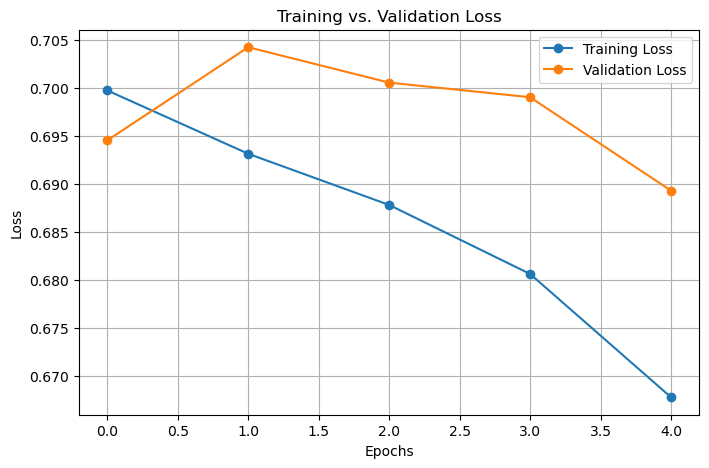

In [364]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    """
    Plots the training vs validation loss curve.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# After training, call this function
plot_loss_curve(history)

#### Optimize learning rate using ReduceLROnPlateau

This adjusts learning rate when validation loss reduces.  It also stops training early to prevent overfitting.

In [88]:
# Method that uses ReduceLROnPlateau learning rate optimization

from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def train_lstm(df, target_column='Target', sequence_length=5, epochs=5, batch_size=8, test_size=0.2):
    """
    Trains an LSTM model on time-series data with Early Stopping and Learning Rate Reduction on Plateau.
    """
    # Create sequences
    X, y = create_sequences(df, target_column, sequence_length)

    # Reshape for LSTM input (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))

    # Split data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Define Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

    # Define LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model with callbacks
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_test, y_test), 
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    return model, accuracy, history, X_test, y_test



#### Use above method to train the model

In [90]:
import numpy as np

model, acc, history, X_test, y_test = train_lstm(df, target_column='Target', sequence_length=8, epochs=50, batch_size=5)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4535 - loss: 0.7023 - val_accuracy: 0.4646 - val_loss: 0.7026 - learning_rate: 0.0010
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.4747 - val_loss: 0.7032 - learning_rate: 0.0010
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.5802 - loss: 0.6827 - val_accuracy: 0.4747 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.6172 - loss: 0.6747 - val_accuracy: 0.4747 - val_loss: 0.7006 - learning_rate: 0.0010
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.6265 - loss: 0.6760 - val_accuracy: 0.4848 - val_loss: 0.6992 - learning_rate: 0.0010
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.6576 - loss: 0.6652 - val_accuracy: 0.4848 - val_loss: 0.7098 - learning_rate: 0.0010
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.6327 - loss: 0.6658 - val_accuracy:

From above, we can see the accuracy is 59% and it is almost same without this optimization.

#### Confusion matrix with Reduced LR Optimization

  The one with 2 LSTM layers produced an accuracy of 52%. This is by far the best performance for our model out of all hyper parameter tunings done above. Let's check confusion matrix for this.

In [82]:
# Predict on the test set
y_pred = model.predict(X_test)

# You can convert the predicted values into the desired format (e.g., class labels)
y_pred_class = (y_pred > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


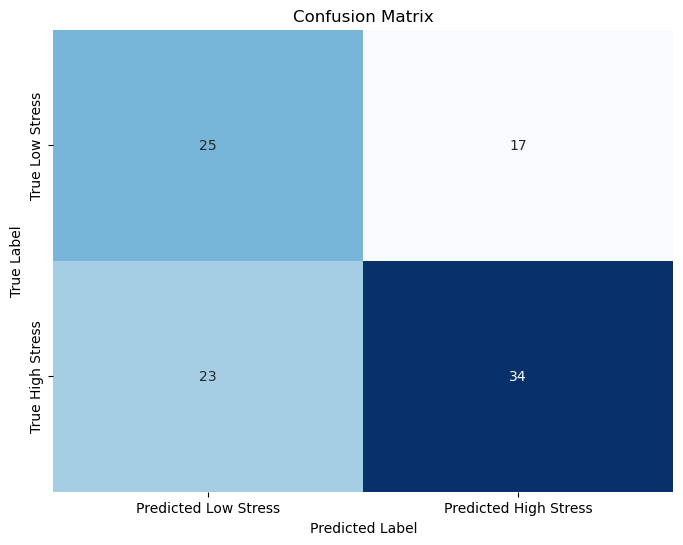

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix calculation
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Low Stress', 'Predicted High Stress'], yticklabels=['True Low Stress', 'True High Stress'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### Loss Curve

Let's check loss curve for this.

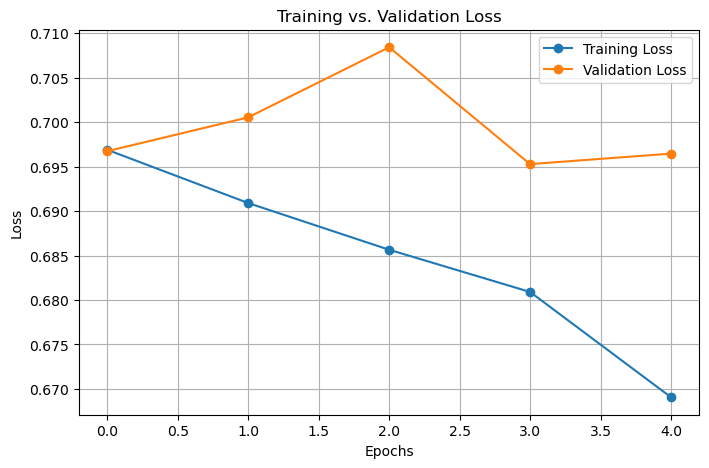

In [372]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    """
    Plots the training vs validation loss curve.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# After training, call this function
plot_loss_curve(history)

#### Plot the predicted vs actual for test data

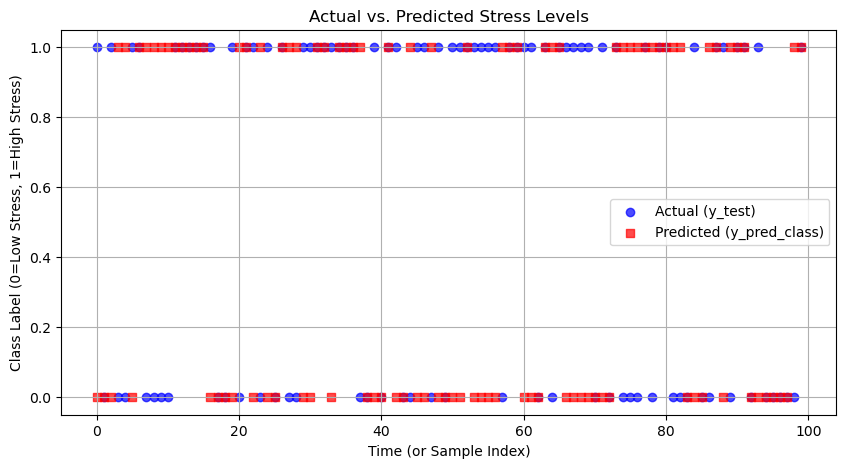

In [370]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label="Actual (y_test)", marker='o', color='blue', alpha=0.7)
plt.scatter(range(len(y_pred_class)), y_pred_class, label="Predicted (y_pred_class)", marker='s', color='red', alpha=0.7)

plt.xlabel("Time (or Sample Index)")
plt.ylabel("Class Label (0=Low Stress, 1=High Stress)")
plt.title("Actual vs. Predicted Stress Levels")
plt.legend()
plt.grid(True)
plt.show()

#### Conclusion for LSTM Fine Tuning

1. The single layer with sequences of 8, 1 LSTM layer produces a performance of 52% with loss curve showing downward trend
   from 42% earlier without any optimizations.
2. Out of 100 records in validation, the model identified 27 entries with low stress as highly stressed. Also, identified 24
   entries with high stress as low stressed.   
4. The performance is in 48% due to number of records in training data which is just 500. Often, models struggle with such small data.
5. Further optimizations didn't improve the performance drastically.       

### Second Machine Learning Method - Exponential Smoothing Recurrent Neural Networks (ESRNN) - Classification Problem

Let's use ESRNN for checking the Stress levels data set. Exponential Smoothing will help model the underlying seasonality and trends in the data. We are classifying high stress Vs low stress based on the time series data.

#### Model creation

 The ESRNN model is created for stress level time series data using Pytorch.

In [962]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ESRNN(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1):
        super(ESRNN, self).__init__()

        # Exponential Smoothing Parameter
        self.alpha = nn.Parameter(torch.tensor(0.5))  # Learnable smoothing factor

        # LSTM Block
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully Connected Output Layer
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Exponential Smoothing: Apply smoothing to the first time step
        smoothed = x[:, 0, :] * self.alpha + (1 - self.alpha) * x[:, 0, :]
        smoothed = smoothed.unsqueeze(1)  # Reshape to match input

        # Pass through LSTM
        lstm_out, _ = self.lstm(smoothed)

        # Fully Connected Output
        output = self.fc(lstm_out[:, -1, :])  # Take last timestep output
        return output
        
def create_esrnn(df, target_column='Target', sequence_length=5, test_size=0.2, lr=0.01):
    """
    Prepares the data and initializes the model, criterion, and optimizer.
    """
    # Create sequences
    X, y = create_sequences(df, target_column, sequence_length)

    # Convert to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=test_size, shuffle=False)

    # Define model, criterion, and optimizer
    model = ESRNN(input_size=X_train.shape[2])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    return model, criterion, optimizer, X_train, X_test, y_train, y_test



#### Create the ESRNN model

In [964]:
model, criterion, optimizer, X_train, X_test, y_train, y_test = create_esrnn(df)


#### Train the ESRNN model

#### Create Model Training Method

In [966]:
def train_esrnn(model, criterion, optimizer, X_train, X_test, y_train, y_test, epochs=13):
    """
    Trains the ESRNN model and returns training and test loss history.
    """
    train_loss_history = []
    test_loss_history = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        train_loss_history.append(loss.item())  # Store training loss

        # Evaluate on test data
        model.eval()
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = criterion(y_test_pred, y_test).item()
            test_loss_history.append(test_loss)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Train Loss: {loss.item():.4f} - Test Loss: {test_loss:.4f}")

    return train_loss_history, test_loss_history


#### Train the ESRNN model

In [968]:
# Train Model
train_loss_history, test_loss_history = train_esrnn(model, criterion, optimizer, X_train, X_test, y_train, y_test, epochs=13)

Epoch 0/13 - Train Loss: 0.3695 - Test Loss: 0.4121
Epoch 10/13 - Train Loss: 0.2529 - Test Loss: 0.2565


#### Plot the loss curve

In [972]:
def plot_loss_curve(train_loss_history, test_loss_history):
    """
    Plots training and test loss curves.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(train_loss_history, label="Training Loss", linestyle='-', marker='o')
    plt.plot(test_loss_history, label="Test Loss", linestyle='-', marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Test Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

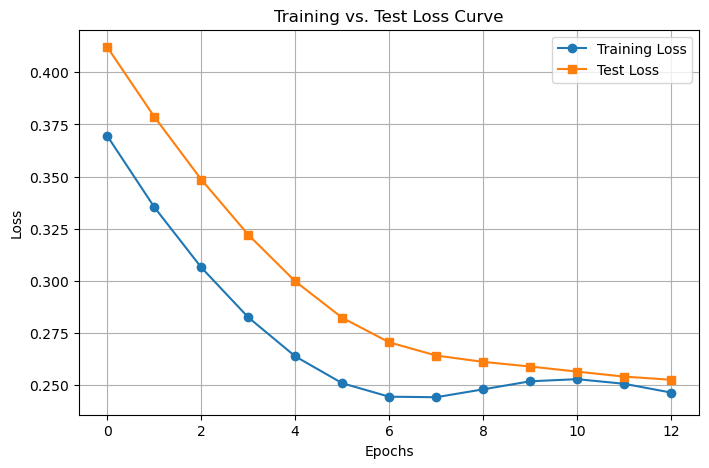

In [974]:
# Plot Loss Curve
plot_loss_curve(train_loss_history, test_loss_history)

#### ESRNN Model Performance

This model performs really well compared to LSTM one and the loss curve is smooth in reduction. The model accuracy is 76% and it is a significant improvement to using LSTM alone.

#### ESRNN Model Fine tuning with ReducedLRPlateau

Train an ESRNN model on time-series data with ReduceLROnPlateau and Early Stopping

In [1002]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class ESRNN(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=1):
        super(ESRNN, self).__init__()

        # Exponential Smoothing Parameter
        self.alpha = nn.Parameter(torch.tensor(0.5))  # Learnable smoothing factor

        # LSTM Block
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully Connected Output Layer
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # Exponential Smoothing: Apply smoothing to the first time step
        smoothed = x[:, 0, :] * self.alpha + (1 - self.alpha) * x[:, 0, :]
        smoothed = smoothed.unsqueeze(1)  # Reshape to match input

        # Pass through LSTM
        lstm_out, _ = self.lstm(smoothed)

        # Fully Connected Output
        output = self.fc(lstm_out[:, -1, :])  # Take last timestep output
        return output


def train_esrnn(df, target_column='Target', sequence_length=5, epochs=13, batch_size=8, test_size=0.2, lr=0.01, patience=5):
    """
    Trains an ESRNN model on time-series data with ReduceLROnPlateau and Early Stopping.
    """
    # Create sequences
    X, y = create_sequences(df, target_column, sequence_length)

    # Convert to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=test_size, shuffle=False)

    # Define model
    model = ESRNN(input_size=X_train.shape[2])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Learning Rate Scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    # Early Stopping Parameters
    best_val_loss = float('inf')
    patience_counter = 0

    # Store training and validation loss
    train_loss_history = []
    test_loss_history = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        train_loss_history.append(loss.item())

        # Evaluate on test data
        model.eval()
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = criterion(y_test_pred, y_test).item()
            test_loss_history.append(test_loss)

        # Reduce Learning Rate on Plateau
        scheduler.step(test_loss)

        # Early Stopping Logic
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            patience_counter = 0  # Reset counter
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Print progress every 10 epochs
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}/{epochs} - Train Loss: {loss.item():.4f} - Test Loss: {test_loss:.4f}")

    # Evaluate final model on test set
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        #print(f"y-test - {y_test} y-test-pred - {y_test_pred}")
        final_test_loss = criterion(y_test_pred, y_test).item()

    print(f"Final Test Loss: {final_test_loss:.4f}")
    # Plot Training vs. Validation Loss
    plt.figure(figsize=(8, 5))
    plt.plot(train_loss_history, label="Training Loss", linestyle='-', marker='o')
    plt.plot(test_loss_history, label="Validation Loss", linestyle='-', marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    #return model, train_loss_history, test_loss_history


#### Train and check performance

Train and plot the loss curve.

Epoch 0/13 - Train Loss: 0.5384 - Test Loss: 0.6022
Epoch 10/13 - Train Loss: 0.2472 - Test Loss: 0.2585
Epoch 12/13 - Train Loss: 0.2631 - Test Loss: 0.2563
Final Test Loss: 0.2563


/opt/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


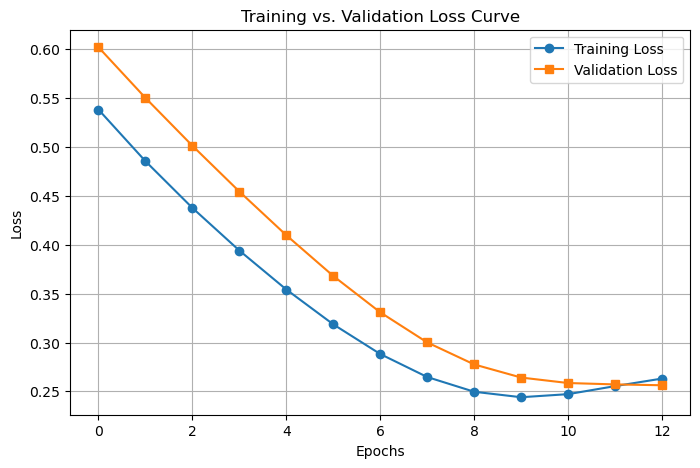

In [1004]:
train_esrnn(df)

 From above, the optimization with ReducedLRPlateau didn't have any effect. Let's try other things.

#### Fine tuniing ESRNN with adding more LSTM layers, Learning rate to 0.001 and epochs to 100

In [1016]:
class ESRNN(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2):  # Increased hidden size and layers
        super(ESRNN, self).__init__()

        # Exponential Smoothing Parameter
        self.alpha = nn.Parameter(torch.tensor(0.5))

        # LSTM Block (More layers & bigger hidden size)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Fully Connected Output Layer
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        smoothed = x[:, 0, :] * self.alpha + (1 - self.alpha) * x[:, 0, :]
        smoothed = smoothed.unsqueeze(1)

        lstm_out, _ = self.lstm(smoothed)
        output = self.fc(lstm_out[:, -1, :])  # Last timestep output
        return output
def train_esrnn(df, target_column='Target', sequence_length=5, epochs=100, batch_size=8, test_size=0.2, lr=0.001, patience=5):
    """
    Trains an ESRNN model on time-series data with ReduceLROnPlateau and Early Stopping.
    """
    # Create sequences
    X, y = create_sequences(df, target_column, sequence_length)

    # Convert to PyTorch tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=test_size, shuffle=False)

    # Define model
    model = ESRNN(input_size=X_train.shape[2])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Learning Rate Scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    # Early Stopping Parameters
    best_val_loss = float('inf')
    patience_counter = 0

    # Store training and validation loss
    train_loss_history = []
    test_loss_history = []

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

        train_loss_history.append(loss.item())

        # Evaluate on test data
        model.eval()
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = criterion(y_test_pred, y_test).item()
            test_loss_history.append(test_loss)

        # Reduce Learning Rate on Plateau
        scheduler.step(test_loss)

        # Early Stopping Logic
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            patience_counter = 0  # Reset counter
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Print progress every 10 epochs
        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}/{epochs} - Train Loss: {loss.item():.4f} - Test Loss: {test_loss:.4f}")

    # Evaluate final model on test set
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        final_test_loss = criterion(y_test_pred, y_test).item()

    print(f"Final Test Loss: {final_test_loss:.4f}")

    # Plot Training vs. Validation Loss
    plt.figure(figsize=(8, 5))
    plt.plot(train_loss_history, label="Training Loss", linestyle='-', marker='o')
    plt.plot(test_loss_history, label="Validation Loss", linestyle='-', marker='s')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training vs. Validation Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    return model, train_loss_history, test_loss_history        

Epoch 0/100 - Train Loss: 0.4915 - Test Loss: 0.5823
Epoch 10/100 - Train Loss: 0.4069 - Test Loss: 0.4837
Epoch 20/100 - Train Loss: 0.3153 - Test Loss: 0.3753
Epoch 30/100 - Train Loss: 0.2480 - Test Loss: 0.2830
Epoch 40/100 - Train Loss: 0.2486 - Test Loss: 0.2537
Early stopping at epoch 47
Final Test Loss: 0.2553


/opt/anaconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


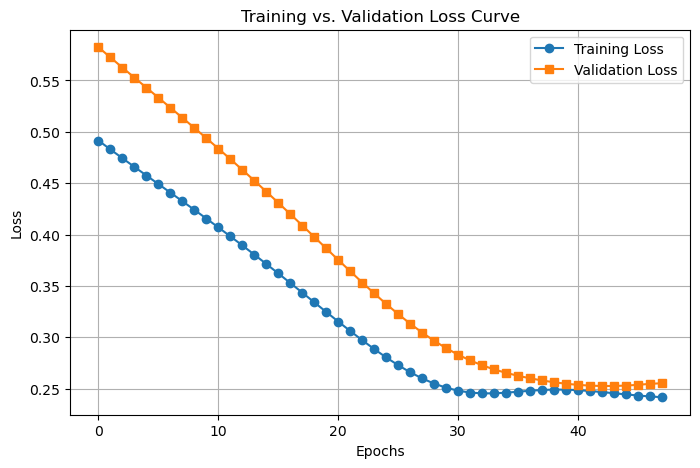

In [1018]:
model, train_loss_history, test_loss_history  = train_esrnn(df)

#### Conclusion on Fine tuning
  The model performance is not getting improved from 75% with new learning rate, increase in number of epochs or modifying the sequences but better than 52% we got from LSTM.

# References:

OpenAI. (2025). ChatGPT (Version 4.0) [Large language model]. OpenAI. https://chat.openai.com/

Kapoor, A. (2019). Hands-on artificial intelligence for IoT: Expert machine learning and deep learning techniques for developing smarter IoT systems. Packt Publishing.

Minteer, A. (2017). Analytics for the Internet of Things (IoT): Intelligent analytics for your intelligent devices. Packt Publishing.